In [ ]:
conda install -c conda-forge chemdataextractor

In [1]:
import chemdataextractor

In [2]:
from chemdataextractor import Document

In [100]:
import pubchempy as pcp

In [138]:
bio_dic=dict()

In [139]:
def create_dict(fname):
    f = open(fname, 'rb')
    doc = Document.from_file(f)
    l=doc.records.serialize()
    for i in range(len(l)):
        if 'names' in l[i].keys():
            if pcp.get_cids(l[i]['names'][0],'name'):
                bio_dic[pcp.get_cids(l[i]['names'][0],'name')[0]]=l[i]['names']

In [140]:
create_dict('OvarianPaper.pdf')

In [141]:
create_dict('ovarian_cancer.pdf')

In [143]:
create_dict('ovarian_cancer2.pdf')

In [144]:
create_dict('ovarian_cancer3.pdf')

In [145]:
create_dict('ovarian_cancer4.pdf')

In [146]:
create_dict('ovarian_cancer5.pdf')

In [147]:
len(bio_dic)

133

In [149]:
from collections import OrderedDict

In [150]:
final_dict=OrderedDict(sorted(bio_dic.items()))

In [151]:
final_dict

OrderedDict([(264, ['fatty acids']),
             (280, ['CO2']),
             (602, ['alanine']),
             (679, ['DMSO', 'dimethyl sulfoxide']),
             (783, ['H']),
             (936, ['nicotinamide', 'Nicotinamide']),
             (947, ['N']),
             (977, ['oxygen']),
             (1720, ['4AN']),
             (2123, ['Hexalen']),
             (2187, ['anastrozole']),
             (2244, ['acetylsalicylic acid']),
             (2349, ['penicillin']),
             (2907, ['cyclophosphamide']),
             (2954, ['DAPI']),
             (3016, ['Dupin']),
             (3690, ['Ifosfamide', 'ifosfamide']),
             (3902, ['letrozole']),
             (4156, ['MMS']),
             (5789, ['thymidine']),
             (5884, ['NADPH']),
             (5951, ['Ser']),
             (5959, ['CAF']),
             (5960, ['aspartate']),
             (5978, ['vincristine']),
             (5997, ['cholesterol']),
             (6057, ['tyrosine']),
             (6267, ['asp

In [154]:
f=open("OvarianCancer_dataset.txt","w")

In [155]:
for k,v in final_dict.items():
    f.write('%s %s\n' % (k,v))
f.close()

In [199]:
dict_df={k:v[0] for k,v in final_dict.items()}

In [8]:
pip install pubchempy

  Created wheel for pubchempy: filename=PubChemPy-1.0.4-py3-none-any.whl size=13825 sha256=c16865b08e189d614a4a1ea784e88f74e72ba03e19554f8f08338a74f1bb38fc
  Stored in directory: c:\users\vam\appdata\local\pip\cache\wheels\b0\8c\ba\3b00b89931153bf5a4eaa8e73bd1b0319a879cc45175326854
Successfully built pubchempy



In [194]:
import pandas as pd

In [221]:
df=pd.DataFrame([dict_df.keys(),dict_df.values()])
df=df.T
df=df.rename(columns={df.columns[0]:'CID',df.columns[1]:'Name'})
df

,CID,Name
0,264,fatty acids
1,280,CO2
2,602,alanine
3,679,DMSO
4,783,H
...,...,...
128,135424953,INCB024360
129,135564655,SGI-110
130,135565082,Talazoparib
131,136033680,Poly-ICLC


In [222]:
df["SMILES"]=df['CID'].apply(lambda x:pcp.Compound.from_cid(x).isomeric_smiles)

In [223]:
df

,CID,Name,SMILES
0,264,fatty acids,CCCC(=O)O
1,280,CO2,C(=O)=O
2,602,alanine,CC(C(=O)O)N
3,679,DMSO,CS(=O)C
4,783,H,[HH]
...,...,...,...
128,135424953,INCB024360,C1=CC(=C(C=C1N=C(C2=NON=C2N)NO)Cl)F
129,135564655,SGI-110,C1[C@@H]([C@H](O[C@H]1N2C=NC3=C2N=C(NC3=O)N)CO...
130,135565082,Talazoparib,CN1C(=NC=N1)[C@@H]2[C@H](NC3=CC(=CC4=C3C2=NNC4...
131,136033680,Poly-ICLC,C1=CN(C(=O)N=C1N)C2C(C(C(O2)COP(=O)(O)O)O)O.C1...


In [224]:
df.to_excel('OvarianCancer.xlsx')

In [170]:
def test_fn(test):
    l=[]
    for i in test.split():
        if pcp.get_cids(i,'name'):
            if pcp.get_cids(i,'name')[0] in final_dict.keys():
                l.append(i)
    return(l)

In [171]:
test1="""Chemotherapy for ovarian cancer is used in neoadjuvant, adjuvant, and maintenance therapy. Agents used include bevacizumab, platinum-based regimens, and poly (ADP-ribose) polymerase (PARP) inhibitors.

Standard postoperative chemotherapy is combination therapy with platinum and paclitaxel. Carboplatin plus paclitaxel is the preferred initial regimen"""

In [172]:
test_fn(test1)

['platinum', 'Carboplatin', 'paclitaxel']

In [173]:
test2="""Drugs Approved for Ovarian, Fallopian Tube, or Primary Peritoneal Cancer
Alkeran (Melphalan)
Avastin (Bevacizumab)
Bevacizumab
Carboplatin
Cisplatin
Cyclophosphamide
Doxorubicin Hydrochloride
Doxil (Doxorubicin Hydrochloride Liposome)
Doxorubicin Hydrochloride Liposome
Gemcitabine Hydrochloride
Gemzar (Gemcitabine Hydrochloride)
Hycamtin (Topotecan Hydrochloride)
Infugem (Gemcitabine Hydrochloride)
Lynparza (Olaparib)
Melphalan
Niraparib Tosylate Monohydrate
Olaparib
Paclitaxel
Paraplatin (Carboplatin)
Rubraca (Rucaparib Camsylate)
Rucaparib Camsylate
Tepadina (Thiotepa)
Thiotepa
Topotecan Hydrochloride
Zejula (Niraparib Tosylate Monohydrate)"""

In [175]:
test_fn(test2)

['Alkeran',
 'Carboplatin',
 'Cisplatin',
 'Cyclophosphamide',
 'Doxorubicin',
 'Doxil',
 'Doxorubicin',
 'Gemcitabine',
 'Gemzar',
 'Lynparza',
 'Melphalan',
 'Niraparib',
 'Olaparib',
 'Paclitaxel',
 'Paraplatin',
 'Rubraca',
 'Rucaparib',
 'Topotecan',
 'Zejula']

In [176]:
import os
import sys
from time import sleep
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from py2cytoscape import cyrest
from IPython.display import Image
%matplotlib inline

In [177]:
cytoscape=cyrest.cyclient()
cytoscape.version()

apiVersion v1
cytoscapeVersion 3.8.2


In [178]:
cytoscape.session.new()

In [179]:
cytoscape.vizmap.apply(styles="default")

{'views': [61]}

In [180]:
from py2cytoscape.cyrest.base import api

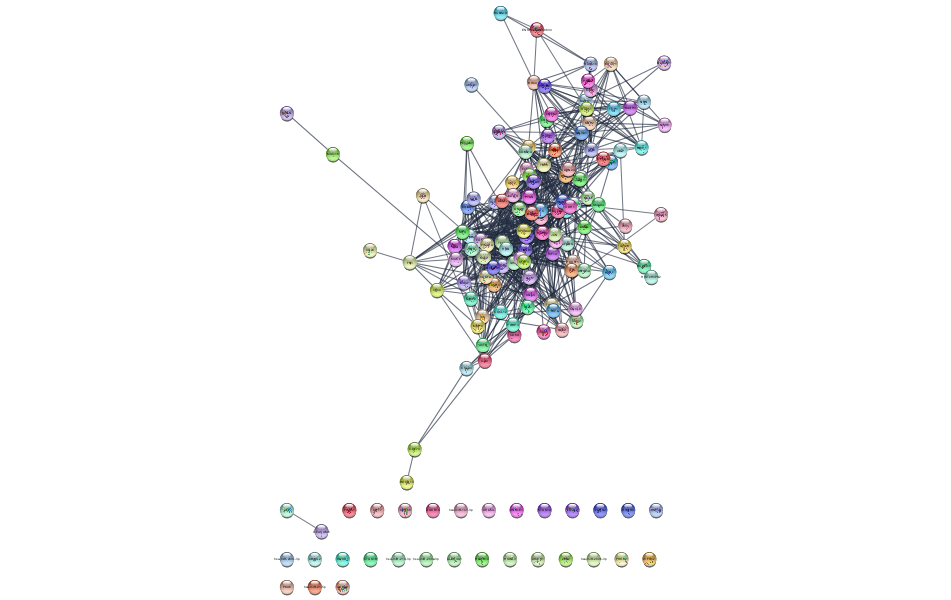

In [181]:
api(namespace="string",command="disease query",PARAMS={"disease":"ovarian cancer","cutoff":"0.9",
                                                       "species":"Homo sapiens","limit":"150"})
sleep(4)
fig=cytoscape.networks.getFirstImageAsPng(networkId=cytoscape.network.get()["SUID"],h=None)
Image(fig.content)

In [182]:
cytoscape.network.list()

{'networks': [51, 78]}

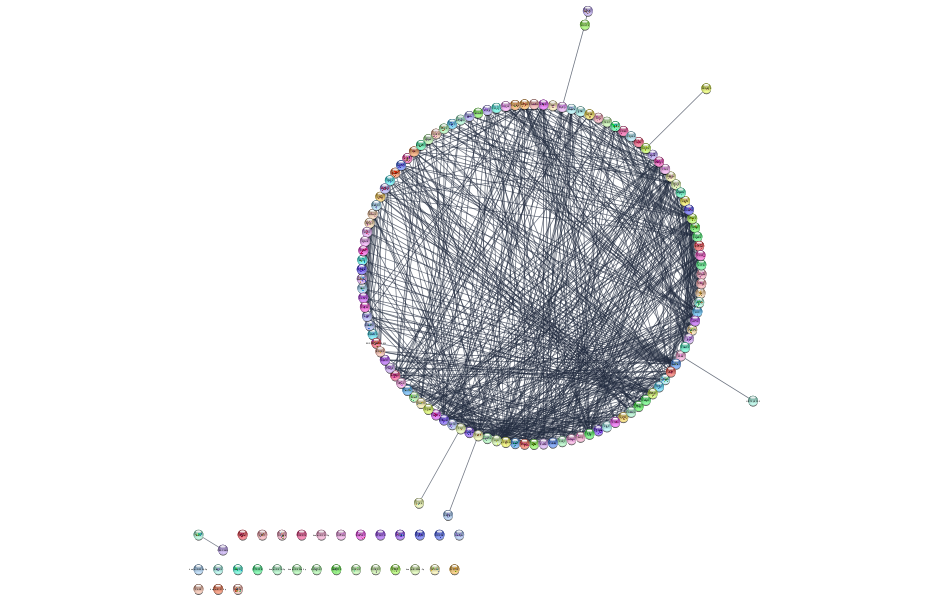

In [183]:
cytoscape.layout.circular()
sleep(2)
fig=cytoscape.networks.getFirstImageAsPng(networkId=cytoscape.network.get()["SUID"],h=None)
Image(fig.content)

In [193]:
pcp.Compound.from_cid(118).isomeric_smiles

'C(CC=O)CN'

In [184]:
cytoscape.node.list_attributes()

['SUID',
 'shared name',
 'name',
 'selected',
 'stringdb::canonical name',
 'display name',
 'stringdb::full name',
 'stringdb::database identifier',
 'stringdb::description',
 '@id',
 'stringdb::namespace',
 'stringdb::node type',
 'query term',
 'stringdb::sequence',
 'stringdb::species',
 'stringdb::STRING style',
 'stringdb::enhancedLabel Passthrough',
 'compartment::cytoskeleton',
 'compartment::cytosol',
 'compartment::endoplasmic reticulum',
 'compartment::endosome',
 'compartment::extracellular',
 'compartment::golgi apparatus',
 'compartment::lysosome',
 'compartment::mitochondrion',
 'compartment::nucleus',
 'compartment::peroxisome',
 'compartment::plasma membrane',
 'stringdb::structures',
 'target::development level',
 'target::family',
 'tissue::adrenal gland',
 'tissue::blood',
 'tissue::bone',
 'tissue::bone marrow',
 'tissue::eye',
 'tissue::gall bladder',
 'tissue::heart',
 'tissue::intestine',
 'tissue::kidney',
 'tissue::liver',
 'tissue::lung',
 'tissue::muscle',


In [185]:
disease_score_table=cytoscape.table.getTable(columns=['stringdb::disease score'],table='node')
disease_score_table.head()

,stringdb::disease score
9606.ENSP00000296871,2.522113
9606.ENSP00000377284,2.653033
9606.ENSP00000329243,2.521039
9606.ENSP00000466834,2.758739
9606.ENSP00000331327,2.614543


In [186]:
disease_score_table=cytoscape.table.getTable(columns=['tissue::heart'],table='node')
disease_score_table.head()

,tissue::heart
9606.ENSP00000296871,2.910646
9606.ENSP00000377284,2.227885
9606.ENSP00000329243,2.821144
9606.ENSP00000466834,NaN
9606.ENSP00000331327,2.553182
